In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train[0]

np.uint8(5)

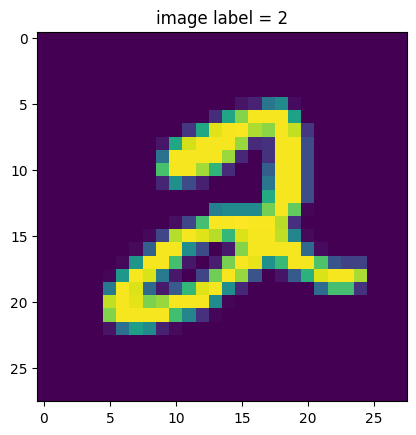

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
#Transforming 2D matrix into a flattened array
model = Sequential([
    Flatten(input_shape=(28,28)), # input layer = 784
    Dense(5, activation = 'relu'), # Hidden layer = 5 neuron
    Dense(10, activation = 'softmax') # Output layer = 10 neuron
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size = 32, verbose = 2)

Epoch 1/5
1875/1875 - 10s - 6ms/step - accuracy: 0.6773 - loss: 0.9999
Epoch 2/5
1875/1875 - 10s - 5ms/step - accuracy: 0.8217 - loss: 0.6065
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8398 - loss: 0.5523
Epoch 4/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8471 - loss: 0.5227
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8579 - loss: 0.4931


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8430 - loss: 0.5325


[0.47204041481018066, 0.8623999953269958]

In [ ]:
model.save('mnist.h5')

In [ ]:
model.get_weights()

[array([[-0.06916068, -0.07738148, -0.05824792, -0.02299839, -0.08612923],
        [ 0.03227049, -0.03029638,  0.04519792, -0.02769895,  0.05529255],
        [-0.00876006,  0.02610005,  0.01526438,  0.01496062,  0.05548795],
        ...,
        [-0.05786216,  0.01422749,  0.00343937, -0.05840946, -0.02379531],
        [ 0.0806073 , -0.00416117,  0.07678406, -0.02528597, -0.0208829 ],
        [-0.01464608, -0.08347235, -0.00539891, -0.02261852, -0.00015649]],
       dtype=float32),
 array([ 0.6752356 , -0.37094492,  0.7796438 , -0.41728655,  1.0240217 ],
       dtype=float32),
 array([[ 0.8189297 , -1.6772496 ,  0.09931664,  0.26011422, -1.2359364 ,
          0.13816378, -0.7042589 ,  0.6038937 , -0.54390794, -0.5760919 ],
        [-1.1916958 ,  0.00762044,  0.39787441,  0.8942274 , -1.076466  ,
         -0.13095891, -0.36623767, -0.6516652 ,  0.11790028, -0.22873504],
        [-0.09194593,  0.6550676 , -0.6320327 , -0.9566932 , -0.7014381 ,
          0.30101004,  0.31553993, -1.133202

Complex N N

In [ ]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, concatenate

In [ ]:
input_layer = Input(shape= (28,28))
flatten = Flatten()(input_layer)
hidden1 = Dense(128, activation = 'relu')(flatten)
hidden2 = Dense(256, activation = 'relu')(flatten)
hidden11 = Dense(64, activation = 'relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer = Dense(10, activation = 'softmax')(merge)

In [ ]:
model = Model(inputs = input_layer, outputs = output_layer)

In [ ]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 784)       │          0 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 128)       │    100,480 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 64)        │      8,256 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 256)       │    200,960 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 320)       │          0 │ dense_28[0][0],   │
│ (Concatenate)       │                   │            │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 10)        │      3,210 │ concatenate_5[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 312,906 (1.19 MB)

 Trainable params: 312,906 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

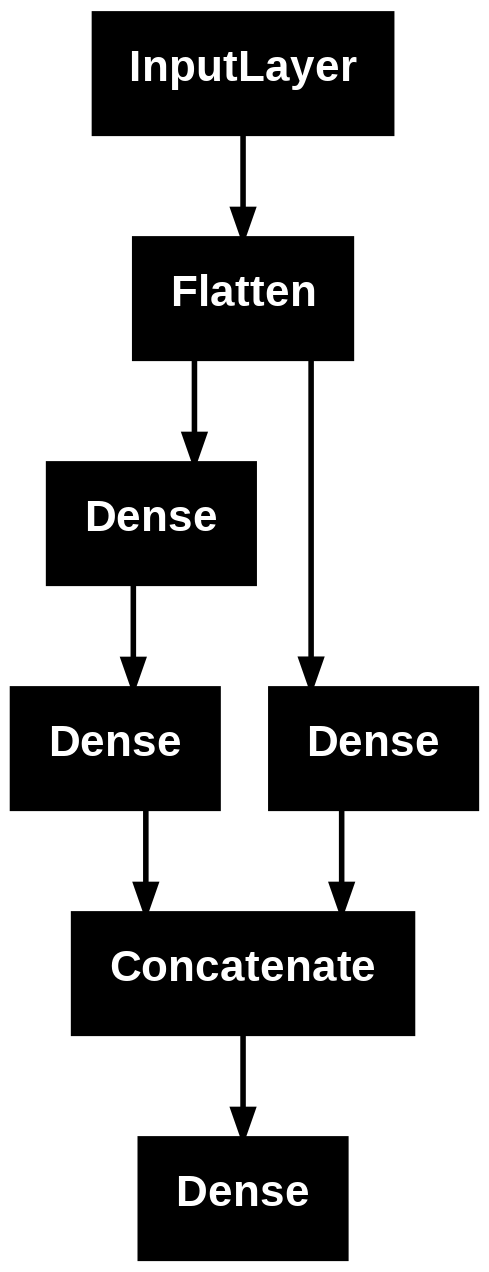

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size = 32, verbose = 2)

Epoch 1/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9911 - loss: 0.0270
Epoch 2/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9941 - loss: 0.0180
Epoch 3/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9939 - loss: 0.0174
Epoch 4/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 5/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9956 - loss: 0.0131


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.1087


[0.08968327194452286, 0.9794999957084656]